# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
#Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

processing_record = 1


print("Beginning Data Retrieval")
print("-----------------------------")

#for loop to gather all required data based on how it's formatted in query_url

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        print(f"Processing Record {processing_record} | {city}")
        
        processing_record += 1
    
    except:
        print("City not found. Skipping...")
    continue
    
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 | mana
Processing Record 2 | barrow
Processing Record 3 | cape town
Processing Record 4 | atasu
Processing Record 5 | vaini
Processing Record 6 | douentza
Processing Record 7 | rikitea
Processing Record 8 | kodiak
Processing Record 9 | mar del plata
Processing Record 10 | constitucion
Processing Record 11 | bubaque
Processing Record 12 | veraval
Processing Record 13 | souillac
Processing Record 14 | lorengau
Processing Record 15 | parkes
Processing Record 16 | bredasdorp
Processing Record 17 | tiksi
Processing Record 18 | punta arenas
Processing Record 19 | coquimbo
Processing Record 20 | busselton
Processing Record 21 | kapaa
Processing Record 22 | torbay
Processing Record 23 | gornyy
Processing Record 24 | pochutla
Processing Record 25 | lavrentiya
Processing Record 26 | atuona
Processing Record 27 | arraial do cabo
Processing Record 28 | college
Processing Record 29 | tavrichanka
Processing Record 30 | albany

Processing Record 236 | dom pedro
Processing Record 237 | deputatskiy
Processing Record 238 | chapais
Processing Record 239 | perth
Processing Record 240 | salemi
Processing Record 241 | kungurtug
Processing Record 242 | tura
City not found. Skipping...
Processing Record 243 | uyuni
Processing Record 244 | santa rosa
City not found. Skipping...
Processing Record 245 | kristiinankaupunki
Processing Record 246 | goderich
Processing Record 247 | eyl
Processing Record 248 | tiznit
Processing Record 249 | ballina
Processing Record 250 | tokur
Processing Record 251 | felipe carrillo puerto
Processing Record 252 | itaparica
Processing Record 253 | missoula
Processing Record 254 | mastic beach
Processing Record 255 | sorong
Processing Record 256 | dutse
Processing Record 257 | bitkine
Processing Record 258 | daugavpils
Processing Record 259 | kodinsk
City not found. Skipping...
Processing Record 260 | kimbe
Processing Record 261 | quelimane
Processing Record 262 | severo-kurilsk
Processing Rec

City not found. Skipping...
Processing Record 466 | puerto colombia
Processing Record 467 | nyzhni sirohozy
Processing Record 468 | boda
Processing Record 469 | chama
Processing Record 470 | la ronge
Processing Record 471 | faya
Processing Record 472 | puerto del rosario
City not found. Skipping...
Processing Record 473 | chernelytsya
Processing Record 474 | clinton
City not found. Skipping...
Processing Record 475 | gangakher
Processing Record 476 | yenagoa
Processing Record 477 | wodonga
Processing Record 478 | pangai
Processing Record 479 | chicama
City not found. Skipping...
Processing Record 480 | ambilobe
Processing Record 481 | ust-nera
Processing Record 482 | amahai
City not found. Skipping...
Processing Record 483 | puyang
Processing Record 484 | carauari
Processing Record 485 | kochevo
Processing Record 486 | javanrud
Processing Record 487 | havoysund
Processing Record 488 | kannangad
Processing Record 489 | kefalos
Processing Record 490 | moju
City not found. Skipping...
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [53]:
#making a dictionary with the columns I need.
weather_city_dict = {"City": city_name,"Lat": lat,"Lng": lng, "Max Temp": max_temp, "Humidity": humidity,
                     "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date}
city_weather = pd.DataFrame(weather_city_dict)
city_weather.to_csv("../WeatherPy/city_weather.csv")
city_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mana,5.6592,-53.7767,77.25,83,96,11.74,GF,1611025426
1,Barrow,71.2906,-156.7887,-2.20,78,90,20.71,US,1611025426
2,Cape Town,-33.9258,18.4232,68.00,88,0,10.36,ZA,1611025426
3,Atasū,48.6814,71.6433,14.02,87,93,5.12,KZ,1611025426
4,Vaini,-21.2000,-175.2000,86.00,74,75,9.22,TO,1611025426
...,...,...,...,...,...,...,...,...,...
573,Tateyama,34.9833,139.8667,48.99,53,20,12.66,JP,1611025474
574,Itanhém,-17.1664,-40.3300,69.46,92,19,5.14,BR,1611025474
575,Mareeba,-17.0000,145.4333,86.00,66,96,6.91,AU,1611025381
576,São Miguel,-5.4667,-35.3667,80.60,78,40,9.22,BR,1611025474


In [31]:
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,19.208634,19.102604,48.319723,73.200692,52.961938,8.171972,1.611025e+09
std,32.976446,89.269105,32.639327,19.589669,41.428043,6.088739,6.170571e+01
min,-54.800000,-179.166700,-55.570000,13.000000,0.000000,0.340000,1.611025e+09
25%,-7.657675,-58.538750,28.602500,63.000000,1.000000,3.475000,1.611025e+09
50%,21.452950,24.175150,60.540000,79.000000,64.500000,6.510000,1.611025e+09
75%,46.645175,97.472525,73.400000,88.000000,96.000000,11.605000,1.611025e+09
max,78.218600,178.416700,103.260000,100.000000,100.000000,34.490000,1.611025e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#no cities had > 100% humidity.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

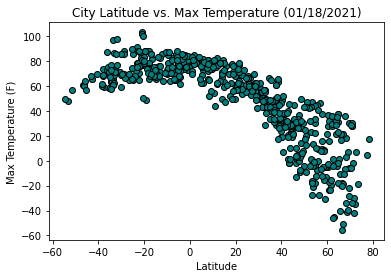

In [40]:
#create x and y values. 
x_values = city_weather["Lat"]
y_values = city_weather["Max Temp"]
#plot the scatter plot using above x and y values and chose colors and labels. 
plt.scatter(x_values, y_values, facecolor = "teal", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (01/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

In [ ]:
# This shows that the higher the latitude is, the lower the max temperature is. 

## Latitude vs. Humidity Plot

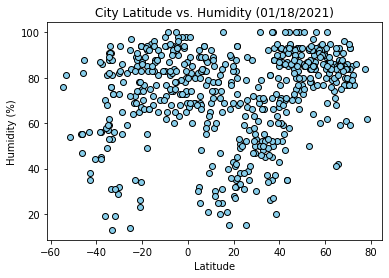

In [44]:
x_values = city_weather["Lat"]
y_hum = city_weather["Humidity"]

plt.scatter(x_values, y_hum, facecolor = "skyblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (01/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

In [ ]:
#It seems that higher humidity is grouped -20 latitude, and 40-50 latitude. 

## Latitude vs. Cloudiness Plot

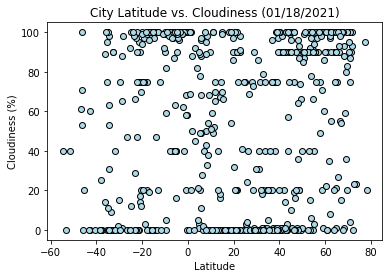

In [47]:
x_values = city_weather["Lat"]
y_cloud = city_weather["Cloudiness"]

plt.scatter(x_values, y_cloud, facecolor = "lightblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (01/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

In [ ]:
#The majority of cities are either 100% cloudiness or zero cloudiness

## Latitude vs. Wind Speed Plot

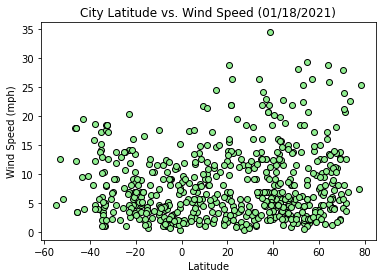

In [49]:
x_values = city_weather["Lat"]
y_wind = city_weather["Wind Speed"]

plt.scatter(x_values, y_wind, facecolor = "lightgreen", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (01/18/2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

In [ ]:
#Most of the cities seem to have hardly any wind speed regardless of latitude. 

## Linear Regression

In [56]:
north_hem = city_weather.loc[city_weather["Lat"] >= 0]
south_hem = city_weather.loc[city_weather["Lng"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8518088799155091


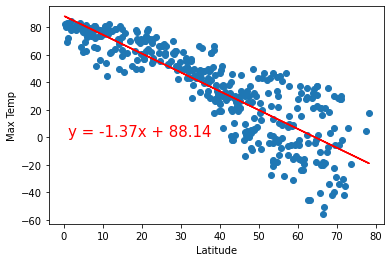

In [63]:
northern_x_values = north_hem["Lat"]
northern_y_values = north_hem["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_values, northern_y_values)
regress_values = northern_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_x_values, northern_y_values)
plt.plot(northern_x_values, regress_values, "r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7574778776490291


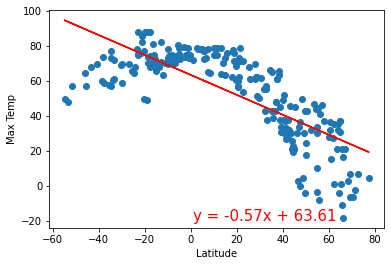

In [71]:
southern_x_values = south_hem["Lat"]
southern_y_values = south_hem["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_values, southern_y_values)
regress_values = southern_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_x_values, southern_y_values)
plt.plot(southern_x_values, regress_values, "r-")
plt.annotate(line_eq,(1,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.36477821237203395


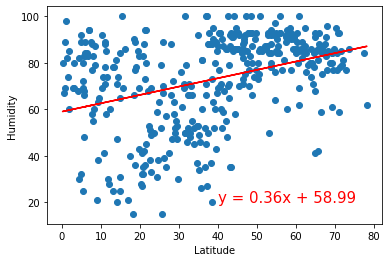

In [70]:
northern_x_values = north_hem["Lat"]
northern_y_hum = north_hem["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_values, northern_y_hum)
regress_values = northern_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_x_values, northern_y_hum)
plt.plot(northern_x_values, regress_values, "r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.01805334768006356


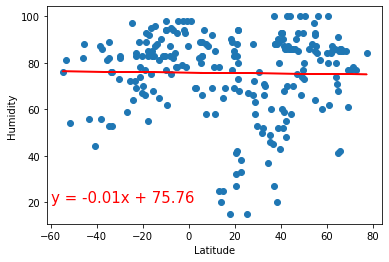

In [85]:
southern_x_values = south_hem["Lat"]
southern_y_hum = south_hem["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_values, southern_y_hum)
regress_values = southern_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_x_values, southern_y_hum)
plt.plot(southern_x_values, regress_values, "r-")
plt.annotate(line_eq,(-60,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23196772071138277


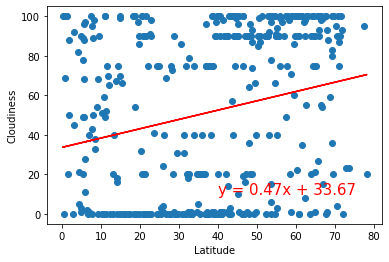

In [78]:
northern_x_values = north_hem["Lat"]
northern_y_cloud = north_hem["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_values, northern_y_cloud)
regress_values = northern_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_x_values, northern_y_cloud)
plt.plot(northern_x_values, regress_values, "r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2500462638036571


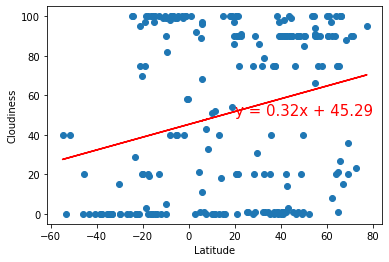

In [84]:
southern_x_values = south_hem["Lat"]
southern_y_cloud = south_hem["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_values, southern_y_cloud)
regress_values = southern_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_x_values, southern_y_cloud)
plt.plot(southern_x_values, regress_values, "r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08655401187501509


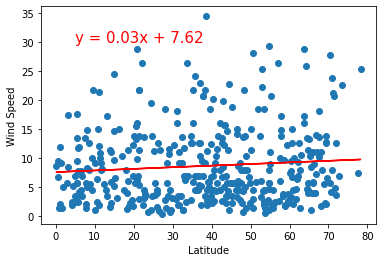

In [88]:
northern_x_values = north_hem["Lat"]
northern_y_wind = north_hem["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_x_values, northern_y_wind)
regress_values = northern_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_x_values, northern_y_wind)
plt.plot(northern_x_values, regress_values, "r-")
plt.annotate(line_eq,(5,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.2350237329896738


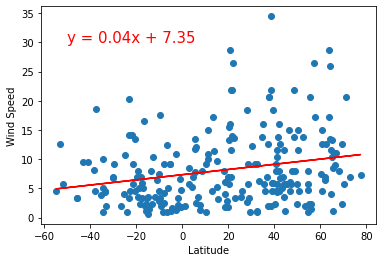

In [90]:
southern_x_values = south_hem["Lat"]
southern_y_wind = south_hem["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_x_values, southern_y_wind)
regress_values = southern_x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_x_values, southern_y_wind)
plt.plot(southern_x_values, regress_values, "r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()